# HDDA. Home Assignment 2

## Obective

Second home assignment is devoted to Factor analysis topic. Factor analysis is a powerful technique for reconstructing a hidden data structure, which in turn is one of the possible tools for identifying of the cluster identities. 

And this means that the model of factor analysis can be used for pattern recognition in general, and image recognition in particular. In this homework, I suggest you consolidate knowledge in the field of factor analysis by applying it to one of the subtasks in the field of face recognition. 

As mentioned in the laboratory session, when trying to use factor analysis as a predictive model, a number of questions arise. 
- Dimension of the matrix defining the data structure (location)
- Estimation of the matrix defining the rotation of the basis of the space of factors (rotation).
- The uniqueness of such a matrix decomposition in terms of the quality measured by some measure chosen for the evaluation of your model.
- Descriptive power of a model

At the same time we have an approach which which helps us in several issues at once - EM algorithm.

So, it looks like you have to use EM algo of FA model applied to face recognition task. Good. I'm happy.

## Plan

Home assignment consists of several parts.

**Demo part**

EM algorithm for clustering for image recognition 

**Derivation of EM for FA (graded part 1)**

This part is first graded part. You have to derive EM steps for FA model and markdown all the formulas.

**Implementation of derived formulas (graded part 2)**

Here I give you a simple template which supposed to help you with organise EM algorithm in several explicit functions. 

**Fit your FA model by using train dataset of images (graded part 3)**

Here you fit you model by using implemented formulas. 


## Grading criteria
The given dataset is separated into three parts
- Train data
- Test data
- Unseen data

In our case private test data is not for medals but for grading of your solution.

## Deadline
06/11/2018 17:20 MSK

## Demo
Thanks to [ipython-notebooks](https://github.com/cubazis/ipython-notebooks/blob/master/EM/brainseg.ipynb) by Riddhish Bhalodia

In [23]:
%matplotlib inline 

import numpy as np
import scipy as sp
import matplotlib.pyplot as plt

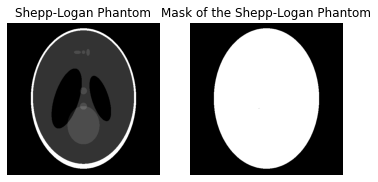

In [24]:
# import the shepp logan phantom
fig, ax = plt.subplots(1,2)
ax[0].imshow(plt.imread('demo/phantom.png'), cmap = 'gray', origin = 'lower')
ax[0].set_title('Shepp-Logan Phantom')
ax[0].set_axis_off()
ax[1].imshow(plt.imread('demo/mask.png'), cmap = 'gray', origin = 'lower')
ax[1].set_title('Mask of the Shepp-Logan Phantom')
ax[1].set_axis_off()

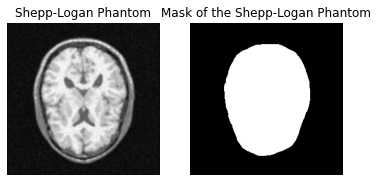

In [25]:
# import the shepp logan phantom
input_phantom = plt.imread('demo/brain.png')
phantom_mask = plt.imread('demo/brain_mask.png')
fig, ax = plt.subplots(1,2)
ax[0].imshow(input_phantom, cmap = 'gray', origin = 'lower')
ax[0].set_title('Shepp-Logan Phantom')
ax[0].set_axis_off()
ax[1].imshow(phantom_mask, cmap = 'gray', origin = 'lower')
ax[1].set_title('Mask of the Shepp-Logan Phantom')
ax[1].set_axis_off()

In [26]:
# Now we will segment this image, as we can see there are four different grayscale intensities
K = 4 # number of clusters
X = input_phantom[phantom_mask == 1]
m = len(X)

In [27]:
# Initialization Part
indices = np.random.permutation(m)
mu = np.zeros(K)
for i in range(K):
    mu[i] = X[indices[i]]
    
sigma = np.ones(K) * np.sqrt(np.var(X));
phi = np.ones(K) * (1.0 / np.double(K));

In [28]:
# Matrix to hold the probability that each data point belongs to each cluster.
# One row per data point, one column per cluster.
W = np.zeros((m, K))
l = np.array([phi, ] * m,dtype=np.float64)

In [29]:
# Expectation maximization

for i in range(1000):
    print('EM iteration', i)
    prevmu = np.zeros(K)
    # E- Step (Expectation)
    pdf = np.zeros((m, K))
    
    # for each cluster evaluate the gaussian points
    for j in range(K):
        pdf[:,j] = (1 / (sigma[j] * np.sqrt(2 * np.pi))) * np.exp(-(X - mu[j])**2 / (2 * sigma[j]**2))
    
    pdf_w = pdf * l
    sm = np.array([np.sum(pdf_w, axis = 1), ] * K, dtype=np.float64).transpose()
    W = pdf_w / sm
    
    # M- Step (Maximization)
    prevmu = np.copy(mu)
    for j in range(K):
        
        # prior probability of the cluster j
        phi[j] = np.mean(W[:, j])
        
        # now compute the weighted average
        mu[j] = np.sum(W[:,j] * X)
        mu[j] = mu[j] / np.sum(W[:,j])
        
        # similarly the sigma
        sigma[j] = np.sum(W[:,j] * (X - mu[j])**2)
        sigma[j] = sigma[j] / np.sum(W[:, j])
        sigma[j] = np.sqrt(sigma[j])
    
    if np.sum(abs(mu  - prevmu)) < 0.001:
        break

EM iteration 0
EM iteration 1
EM iteration 2
EM iteration 3
EM iteration 4
EM iteration 5
EM iteration 6
EM iteration 7
EM iteration 8
EM iteration 9
EM iteration 10
EM iteration 11
EM iteration 12
EM iteration 13
EM iteration 14
EM iteration 15
EM iteration 16
EM iteration 17
EM iteration 18
EM iteration 19
EM iteration 20
EM iteration 21
EM iteration 22
EM iteration 23
EM iteration 24
EM iteration 25
EM iteration 26
EM iteration 27
EM iteration 28
EM iteration 29
EM iteration 30
EM iteration 31
EM iteration 32
EM iteration 33
EM iteration 34


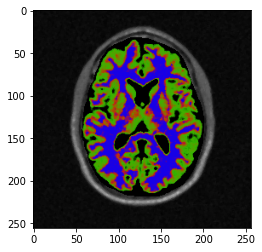

In [30]:
out = np.zeros((input_phantom.shape[0], input_phantom.shape[1], 3))
temp = input_phantom
temp[phantom_mask == 1] = W[:,0]
out[:,:,0] = np.reshape(temp, input_phantom.shape);
temp = input_phantom
temp[phantom_mask == 1] = W[:,1]
out[:,:,1] = np.reshape(temp, input_phantom.shape);
temp = input_phantom
temp[phantom_mask == 1] = W[:,2]
out[:,:,2] = np.reshape(temp, input_phantom.shape);
plt.imshow(out)

## 1. Derivation of EM for FA recognition
### Derive formulas of the model. Use latex notation to note them.

$$PDF(x) = \mathcal{N}(\mu, \ AA^T + \Psi)$$

$Q_i(z^{(i)}) = p(z^{(i)}|x^{(i)};\mu,\Lambda,\Psi)$
$$\mu_{z^{(i)|x(i)}} = \Lambda^T(\Lambda\Lambda^T + \Psi)^{-1}(x^{(i)} - \mu),$$
$$\sum{z^{(i)}|x^{(i)}} = \Iota - \Lambda^T(\Lambda\Lambda^T + \Psi)^{-1}\Lambda$$

So, using these definitions for $\mu_{z^{(i)|x(i)}}$ and $\sum{z^{(i)|x(i)}}$ we have
$$Q_i(z^{(i)}) = \frac {1}{(2\pi)^{k/2}|\sum_{z^{(i)}|x^{(i)}}|^{1/2}}\exp\Big(-\frac{1}{2}(z^{(i)}-\mu_{z^{(i)|x(i)}})^T\sum_{z^{(i)}|x^{(i)}}^{-1}(z^{(i)}-\mu_{z^{(i)|x(i)}}\Big)$$
Let’s now work out the M-step. Here, we need to maximize
$$\sum_{i=1}^n\int_{z^{(i)}}Q_i(z^{(i)})\log\frac{p(x^{(i)},z^{(i)});\mu,\Lambda,\Psi}{Q_i(z^{(i)})}dz^{(i)}$$
With respect to the parameters $\mu$,$\Lambda$, $\Psi$. 

We can simplify it as follows:
$$\sum_{i=1}^n\int_{z^{(i)}}Q_i(z^{(i)})\big[\log{p(x^{(i)}|z^{(i)};\mu,\Lambda,\Psi)}+\log{p(z^{(i)})}-\log{Q_{i}(z^{(i)})}\big]dz^{(i)}$$
$$=\sum_{i=1}^nE_{z^(i) \sim Q_i}\big[\log{p(x^{(i)}|z^{(i)};\mu,\Lambda,\Psi)}+\log{p(z^{(i)})}-\log{Q_{i}(z^{(i)})}\big]$$
Here, the $z^(i) \sim Q_i$ subscript indicates that the expectation is with respect to $z^{(i)}$ drawn from $Q_i$. In the subsequent development, we will omit this
subscript when there is no risk of ambiguity. Dropping terms that do not depend on the parameters, we find that we need to maximize:
$\sum_{i=1}^{n}E[\log{p(x^{(i)}|z^{(i)};\mu,\Lambda,\Psi)}]$
$$=\sum_{i=1}^{n}E\Bigg[\log\frac{1}{(2\pi)^{d/2}|\Psi|^{1/2}}\exp\Bigg(-\frac{1}{2}(x^{(i)}-\mu-\Lambda z^{(i)})^T\Psi^{-1}(x^{(i)}-\mu-\Lambda z^{(i)})\Bigg)\Bigg]$$
$$=\sum_{i=1}^{n}E\Bigg[-\frac{1}{2}\log{|\Psi|}-\frac{n}{2}\log{2\pi}-\frac{1}{2}(x^{(i)}-\mu-\Lambda z^{(i)})^T\Psi^{-1}(x^{(i)}-\mu-\Lambda z^{(i)})\Bigg]$$
Let’s maximize this with respect to $\Lambda$
$$\nabla_\Lambda\sum_{i=1}^{n}-E\Bigg[\frac{1}{2}(x^{(i)}-\mu-\Lambda z^{(i)})^T\Psi^{-1}(x^{(i)}-\mu-\Lambda z^{(i)})\Bigg]$$
$$=\sum_{i=1}^{n}\nabla_\Lambda E\Bigg[-tr\frac{1}{2}z^{(i)^T}\Lambda^T\Psi^{-1}\Lambda z^{(i)} + trz^{(i)^T}\Lambda^T\Psi^{-1}(x^{(i)}-\mu)\Bigg]$$
$$=\sum_{i=1}^{n}\nabla_\Lambda E\Bigg[-tr\frac{1}{2}\Lambda^T\Psi^{-1}\Lambda z^{(i)}z^{(i)^T} + tr\Lambda^T\Psi^{-1}(x^{(i)}-\mu)z^{(i)^T}\Bigg]$$
$$=\sum_{i=1}^{n}E\Bigg[-\Psi^{-1}\Lambda z^{(i)}z^{(i)^T} + \Psi^{-1}(x^{(i)}-\mu)z^{(i)^T}\Bigg]$$
Setting this to zero and simplifying, we get:
$$=\sum_{i=1}^n\Lambda E_{z^(i) \sim Q_i}\Big[z^{(i)}z^{(i)^T}\Big]=\sum_{i=1}^n(x^{(i)}-\mu)E_{z^(i) \sim Q_i}\Big[z^{(i)^T}\Big]$$
Hence, solving for $\Lambda$, we obtain:
$$\Lambda=\Bigg(\sum_{i=1}^n(x^{(i)}-\mu)E_{z^(i) \sim Q_i}\Big[z^{(i)^T}\Big]\Bigg)\Bigg(\sum_{i=1}^nE_{z^(i) \sim Q_i}\Big[z^{(i)}z^{(i)^T}\Big]\Bigg)^{-1}$$
To complete our M-step update, let’s work out the values of the expectations in the equation above. From our definition of $Q_i$ being Gaussian with mean $\mu_{z^{(i)|x(i)}}$
and covariance $\sum{z^{(i)}|x^{(i)}}$, we easily find
$$E_{z^(i) \sim Q_i}\Big[z^{(i)^T}\Big]=\mu_{z^{(i)|x(i)}}^T$$
$$E_{z^(i) \sim Q_i}\Big[z^{(i)}z^{(i)^T}\Big]=\mu_{z^{(i)|x(i)}}\mu_{z^{(i)|x(i)}}^T+\sum{z^{(i)}|x^{(i)}}$$
Substituting this back into equation, we get the M-step update for $\Lambda$:
$$\Lambda=\Bigg(\sum_{i=1}^n(x^{(i)}-\mu)\mu_{z^{(i)|x(i)}}^T\Bigg)\Bigg(\sum_{i=1}^n\mu_{z^{(i)|x(i)}}\mu_{z^{(i)|x(i)}}^T+\sum{z^{(i)}|x^{(i)}}\Big]\Bigg)^{-1}$$
Lastly, we can also find the M-step optimizations for the parameters $\mu$ and $\Psi$. It is not hard to show that the first is given by:
$$\mu=\frac{1}{n}\sum_{i=1}^{n}x^{(i)}$$
Similarly, the diagonal $\Psi$ can be found by calculating
$$\Phi=\frac{1}{n}\sum_{i=1}^{n}x^{(i)}x^{(i)^T}-x^{(i)}\mu_{z^{(i)|x(i)}}^T\Lambda^T - \Lambda\mu_{z^{(i)|x(i)}}x^{(i)^T} + \Lambda(\mu_{z^{(i)|x(i)}}\mu_{z^{(i)|x(i)}}^T+\sum{z^{(i)}|x^{(i)}})\Lambda^T$$
And setting $\Psi_{ii}=\Phi_{ii}$  (i.e., letting $\Psi$ be the diagonal matrix containing only the diagonal entries of $\Phi$).

Taken from CS229 Lecture notes

## 2. FA recognitor Implementation 
### Implementation of derived formulas

In [31]:
import numpy as np

In [32]:
def model_initialization(X, factors):
    mean = np.mean(X, axis=0)
    covariance = np.diag(np.diag(np.cov(np.transpose(X))))
    phi = np.random.random_sample((100, factors))
    return mean, covariance, phi

In [33]:
def factor_model_pdf(X, covariance, mean):
    covariance_total = np.matmul(phi,phi.transpose()) + covariance
    pdf = np.zeros(len(X))    
    for i in range(len(X)):
        temp = np.matmul((X[i] - mean),(np.linalg.inv(covariance_total)))
        temp1 = np.matmul(temp,((X[i] - mean).transpose()))
        pdf[i] = np.exp(-0.5 * temp1)
    return pdf

In [34]:
def e_step(factors, X, phi, mean, covariance):
    expectation_h = np.zeros((factors, len(X)))
    expectation_h_ht = np.zeros((factors,factors, len(X)))
    a = np.zeros((factors,factors, len(X)))

    for i in range(len(X)):
        temp1 = np.matmul(phi.transpose(),np.linalg.inv(covariance))
        temp2 = np.matmul(temp1,phi) + np.eye(factors)
        temp3 = np.matmul(np.matmul(np.linalg.inv(temp2),phi.transpose()), np.linalg.inv(covariance))
        expectation_h[:,i] = np.matmul(temp3, ((X[i] - mean).transpose()))
        a[:,:,i] = expectation_h[:,i] * (expectation_h[:,i][np.newaxis]).transpose()
        expectation_h_ht[:,:,i] = np.linalg.inv(temp2) + a[:,:,i]

    return expectation_h, expectation_h_ht

In [39]:
def m_step(factors, expectation_h, expectation_h_ht, mean, X):
    
    sum_expectation = np.sum(expectation_h_ht, axis = 2)

    y = np.zeros((100, factors,len(X)))
    for i in range(len(X)):
        y[:,:,i] = np.matmul((X[i] - mean)[np.newaxis].transpose(), (expectation_h[:, i][np.newaxis]))

    new_phi = np.matmul((np.sum(y,axis=2)),np.linalg.inv(sum_expectation))

    z = np.zeros((100,100,len(X)))
    for i in range(len(X)):
        centered = (X[i] - mean)[np.newaxis]
        temp = np.matmul(new_phi, expectation_h[:, i])
        temp2 = np.matmul(temp[np.newaxis].transpose(), centered)
        z[:,:,i] = centered * centered.transpose() - temp2

    covariance_temp = np.sum(z,axis = 2)
    new_covariance = covariance_temp / (len(X))

    phi = new_phi
    covariance = new_covariance + (1000 * np.eye(100))

    return phi, covariance

## 3. FA recognitor fitting

### 3.1 Dataset

In this work you work with [FDDB](http://vis-www.cs.umass.edu/fddb/).

Dataset have already been prepared for you. Additional context about data preparation [here](http://vis-www.cs.umass.edu/fddb/README.txt).

Detailed image info example:
```
$ identify face/0001.jpg

> face/0001.jpg JPEG 10x10 10x10+0+0 8-bit sRGB 782B 0.000u 0:00.000

```

In [40]:
# path = "data/face"

import cv2
from os import listdir

def extract(path):
    data = [str(path)+'/'+f for f in listdir(path)]
    res = []
    for p in data:
        image = cv2.imread(p)
        res.append(cv2.cvtColor(image, cv2.COLOR_BGR2GRAY).flatten())
    return res

### 3.2 Model Fitting

In [41]:
from sklearn.metrics import roc_curve
from matplotlib import pyplot as plt

In [42]:
### Set parameters of EM algorithm
factors = 5
iterations = 20

faces = "./data/face"
non_faces = "./data/non_face"

### Use extract function to upload both datasets: FACES, NON_FACES
faces_data = extract(faces)
non_faces_data = extract(non_faces)
### Split datasets into train/test
train_faces = faces_data[:-100]
train_non_faces = non_faces_data[:-100]
test_faces = faces_data[-100:]
test_non_faces = non_faces_data[-100:]

faces_mean, faces_covariance, faces_param = model_initialization(train_faces, factors)
non_faces_mean, non_faces_covariance, non_faces_param = model_initialization(train_non_faces, factors)

for i in range(iterations):
    if i < iterations:
        print("iter: ", i)
        expectation_h, expectation_h_ht = e_step(factors, train_faces, faces_param, faces_mean, faces_covariance)
        phi, covariance = m_step(factors,expectation_h, expectation_h_ht, faces_mean, train_faces)

        expectation_h_non, expectation_h_ht_non = e_step(factors, train_non_faces, non_faces_param, non_faces_mean, non_faces_covariance)
        phi_non, covariance_non = m_step(factors, expectation_h_non, expectation_h_ht_non, non_faces_mean, train_non_faces)


positive_likelihood_for_positive_test = factor_model_pdf(test_faces, covariance, faces_mean)
negative_likelihood_for_positive_test = factor_model_pdf(test_faces, covariance_non, non_faces_mean)
positive_likelihood_for_negative_test = factor_model_pdf(test_non_faces, covariance, faces_mean)
negative_likelihood_for_negative_test = factor_model_pdf(test_non_faces, covariance_non, non_faces_mean)

iter:  0
iter:  1
iter:  2
iter:  3
iter:  4
iter:  5
iter:  6
iter:  7
iter:  8
iter:  9
iter:  10
iter:  11
iter:  12
iter:  13
iter:  14
iter:  15
iter:  16
iter:  17
iter:  18
iter:  19


correctly classified faces:  100
correctly classified non-faces:  79
False Positive Rate  0.21
False Negative Rate  0.0
Misclassification Rate 0.105


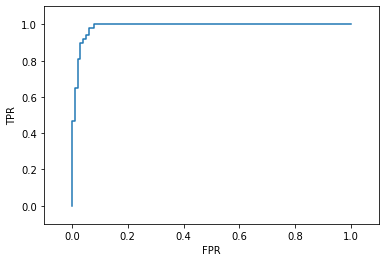

In [43]:
posterior_classified_face = positive_likelihood_for_positive_test / (positive_likelihood_for_positive_test + negative_likelihood_for_positive_test)
posterior_classified_non_face = negative_likelihood_for_positive_test / (negative_likelihood_for_positive_test + positive_likelihood_for_positive_test)
posterior_misclassified_non_face = positive_likelihood_for_negative_test / (positive_likelihood_for_negative_test + negative_likelihood_for_negative_test)
posterior_misclassified_face = negative_likelihood_for_negative_test / (negative_likelihood_for_negative_test + positive_likelihood_for_negative_test)

count_faces = 0
for i in range(len(posterior_classified_face)):
    if posterior_classified_face[i] > posterior_classified_non_face[i]:
        count_faces = count_faces + 1
print("correctly classified faces: ", count_faces)
count_non_faces = 0
for i in range(len(posterior_classified_face)):
    if posterior_misclassified_face[i] > posterior_misclassified_non_face[i]:
        count_non_faces = count_non_faces + 1
print("correctly classified non-faces: ", count_non_faces) 
count_false_positive = 0
for i in range(len(posterior_classified_face)):
    if posterior_misclassified_non_face[i]> 0.5:
        count_false_positive = count_false_positive + 1
print("False Positive Rate ", count_false_positive/100)
count_false_negative = 0
for i in range(len(posterior_classified_face)):
    if posterior_classified_non_face[i] > 0.5:
        count_false_negative = count_false_negative + 1
print("False Negative Rate ", count_false_negative/100) 
misclassification = (float(count_false_positive + count_false_negative)) / (len(posterior_classified_face) + len(posterior_classified_face))
print("Misclassification Rate", misclassification) 


posterior_classification = np.append(posterior_classified_face, (posterior_misclassified_non_face))
labels = np.append(np.ones(100), np.zeros(100))

fpr, tpr, _ = roc_curve(labels, posterior_classification, pos_label=1)
plt.plot(fpr, tpr)
plt.xlabel("FPR")
plt.ylabel("TPR" )
plt.xlim([-0.1,1.1])
plt.ylim([-0.1,1.1])
plt.show()

### Grading part

In [44]:
### MY CODE HERE